# Maps

inspired by 

https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0 

https://gisco-services.ec.europa.eu/distribution/v2/countries/

https://pypi.org/project/pyshp/

https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f



In [11]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

In [12]:
#shp_path = r"./EU_SHP/CNTR_RG_60M_2020_3035.shp" 
shp_path = r"./EU_SHP/CNTR_RG_20M_2020_3035.shp" 

sf = shp.Reader(shp_path)
len(sf.shapes())



257

In [13]:
shapeRecs = sf.shapeRecords()
country_id = 6
country_code = shapeRecs[country_id].record[0]
country_code


'AO'

In [14]:
df_shapes = pd.DataFrame(columns = ['country_code', 'shape'])
#tmp = [(1,1), (2,2)]
#dict = {'country_code': 'IT', 'shape': tmp}
#df_shapes = df_shapes.append(dict, ignore_index = True)
#df_shapes

To completely understand shapefile format start here: 
https://pypi.org/project/pyshp/
https://support.esri.com/en/white-paper/279 

adding to df_shapes 0
adding to df_shapes 1
adding to df_shapes 2


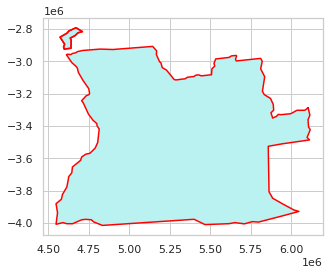

In [15]:
country_id = 6
fillcolor = "c"
bordercolor = "red"
df_shapes = pd.DataFrame(columns = ['country_code', 'shape'])



country_shape = shapeRecs[country_id].shape
idx = []
idx = country_shape.parts
n_parts = len(idx)
n_points = len(country_shape.points)
idx.append(n_points)

plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for i in range(n_parts): #a country may be composed of several shapes
    p0 = idx[i]
    p1 = idx[i+1]
    if (p1-p0)>10:  #avoid small shapes
        shape_ex = sf.shape(country_id)
        seg=shape_ex.points[p0:p1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        nn = len(seg) if i < n_parts else 0
        for ip in range(nn):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]
    plt.plot(x_lon,y_lat, c = bordercolor) 
    plt.fill(x_lon,y_lat, fillcolor)
    
    print("adding to df_shapes", i)
    tmp= [(x_lon[i][0], y_lat[i][0]) for i in range(0, len(x_lon))]
    new_row = {'country_code': 'IT', 'shape': tmp}
    df_shapes = df_shapes.append(new_row, ignore_index = True)
            
    
    
    

In [16]:
for index, row in df_shapes.iterrows():
    print(row)

country_code                                                   IT
shape           [(6105462.626, -3286938.7444), (6116206.915899...
Name: 0, dtype: object
country_code                                                   IT
shape           [(4598295.5423, -2923965.3718999997), (4593279...
Name: 1, dtype: object
country_code                                                   IT
shape           [(4598295.5423, -2923965.3718999997), (4593279...
Name: 2, dtype: object


In [17]:
data = pd.read_excel("EU_data.xlsx",sheet_name ="data",   usecols = "A:B")
xmin = min(data.x)
xmax = max(data.x)
nxorm = (data.x-xmin)/(xmax-xmin)


#colors = cmap(data.x)
#colors
 

In [18]:

n_shapes = len(shapeRecs)
eunames = ['AL','AT','BE','BG','HR','CH','CY','CZ','DK','EE','FI','FR','DE','GR','HU','IE','IT','LV','LT','LU','MT','NL','NO','PL','RO','SK','SI','ES','SE', 'GB']
#eunames = ['AT','IT','SI']
#eunames = ['IT', 'FR', 'ES']


fillcolor = "blue"
bordercolor = "white"

x = data

cmap = plt.get_cmap('brg')
colors = cmap(xnorm)
x_min, x_max = 22E5, 70E5

plt.figure(figsize = (10,10))
#ax = plt.axes()
ax.set_aspect('equal')
df_shapes = pd.DataFrame(columns = ['country_code', 'shape'])

for sh_id in range(n_shapes):
    country_code = shapeRecs[sh_id].record[0]
    if country_code in eunames:
        val = min(data[ data['ISO2'] == country_code ].x)
        country_shape = shapeRecs[sh_id].shape
        idx = []
        idx = country_shape.parts
        n_parts = len(idx)
        n_points = len(country_shape.points)
        idx.append(n_points)

        for i in range(n_parts): #a country may be composed of several shapes
            p0 = idx[i]
            p1 = idx[i+1]
            if (p1-p0)>6:  #avoid small shapes
                shape_ex = sf.shape(sh_id)
                seg=shape_ex.points[p0:p1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                nn = len(seg) if i < n_parts else 0
                for ip in range(nn):
                    x_lon[ip] = seg[ip][0]
                    y_lat[ip] = seg[ip][1]
                    
                if (min(x_lon[0]) > x_min) & (max(x_lon[0]) < x_max):
                    print(country_code, val)
                    fillcolor = (val-xmin)/(xmax-xmin)
                    plt.plot(x_lon,y_lat, c = bordercolor, linewidth =.5, alpha = 1) 
                    plt.fill(x_lon,y_lat, color = cmap(fillcolor), alpha = 1)
                    
                    #print("adding to df_shapes", i)
                    tmp= [(x_lon[i][0], y_lat[i][0]) for i in range(0, len(x_lon))]
                    new_row = {'country_code': country_code, 'shape': tmp}
                    df_shapes = df_shapes.append(new_row, ignore_index = True)
plt.grid(False)
plt.axis('off')
plt.show



NameError: name 'xnorm' is not defined

In [ ]:
# TODO improve color map https://stackoverflow.com/questions/25166804/do-matplotlib-contourf-levels-depend-on-the-amount-of-colors-in-the-colormap


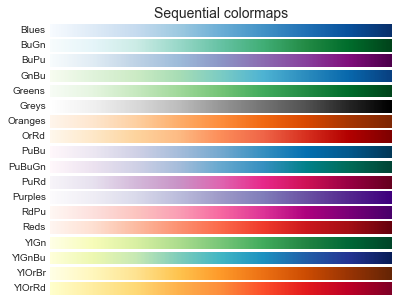

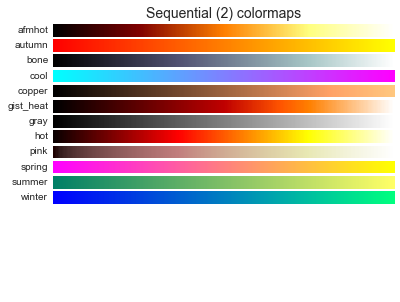

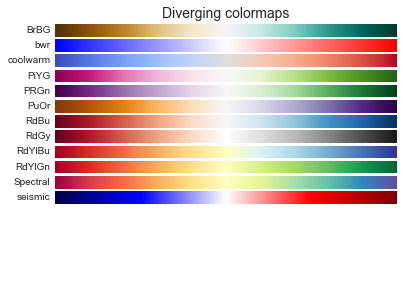

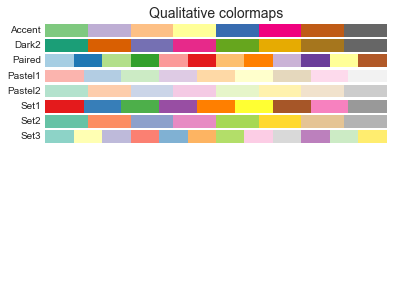

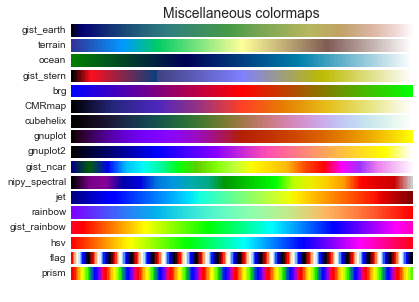

In [ ]:
# https://matplotlib.org/1.4.2/examples/color/colormaps_reference.html

cmaps = [('Sequential',     ['Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool', 'copper',
                             'gist_heat', 'gray', 'hot', 'pink',
                             'spring', 'summer', 'winter']),
         ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                             'seismic']),
         ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3']),
         ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                             'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'gist_ncar',
                             'nipy_spectral', 'jet', 'rainbow',
                             'gist_rainbow', 'hsv', 'flag', 'prism'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

In [ ]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [27]:
df_coords.columns

Index(['CNTR_ID', 'CNTR_NAME', 'NAME_ENGL', 'ISO3_CODE', 'FID', 'coords'], dtype='object')

In [82]:

text = "United Arab Emirates                        "
new_text = "".join([c for c in text if c.isascii()])
new_text = new_text.strip()
new_text

'United Arab Emirates'

In [83]:
df['NAME_ENGL'][1]#.replace("\x00", "")

'Afghanistan\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [101]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


df_coords = read_shapefile(sf)
cols =  [ 'CNTR_NAME', 'NAME_ENGL', 'ISO3_CODE', 'FID']
for col in cols:
    df_coords[col] = df_coords[col].apply(lambda x: x.replace("\x00", ""))

df_coords.to_csv('world_shapes.csv', index = False)

In [103]:
df = pd.read_csv('world_shapes.csv')
df

,CNTR_ID,CNTR_NAME,NAME_ENGL,ISO3_CODE,FID,coords
0,AE,الإمارات العربية المتحدة,United Arab Emirates,ARE,AE,"[(8837659.050700001, 1611402.7382999994), (882..."
1,AF,افغانستان-افغانستان,Afghanistan,AFG,AF,"[(9337416.930300001, 3947645.3164), (9317737.4..."
2,AG,Antigua and Barbuda,Antigua and Barbuda,ATG,AG,"[(-2522850.5996, 2842090.8299), (-2528775.4118..."
3,AI,Anguilla,Anguilla,AIA,AI,"[(-2568965.5712, 3017938.821799999), (-2566172..."
4,AL,Shqipëria,Albania,ALB,AL,"[(5148385.4728999995, 2216598.8893999998), (51..."
...,...,...,...,...,...,...
252,XU,Abyei Region (Disputed Territory),Abyei,XU,XU,"[(6533207.9596, -1136760.9387999997), (6512458..."
253,XV,Bir Tawil (Disputed Territory),Bir Tawil (Disputed Territory),XV,XV,"[(6761156.6216, 269350.9438000005), (6811790.5..."
254,YE,اليمن,Yemen,YEM,YE,"[(9122847.207899999, 224003.682), (9131047.954..."
255,ZA,Suid-Afrika-South Africa-Sewula Afrika-Afrika-...,South Africa,ZAF,ZA,"[(7567822.2794, -6089958.6756), (7559125.59809..."


In [24]:
df_coords


,CNTR_ID,CNTR_NAME,NAME_ENGL,ISO3_CODE,FID,coords
0,AE,الإمارات العربية المتحدة                      ...,United Arab Emirates                        ,ARE,AE,"[(8837659.050700001, 1611402.7382999994), (882..."
1,AF,افغانستان-افغانستان                           ...,Afghanistan                                 ,AFG,AF,"[(9337416.930300001, 3947645.3164), (9317737.4..."
2,AG,Antigua and Barbuda                           ...,Antigua and Barbuda                         ,ATG,AG,"[(-2522850.5996, 2842090.8299), (-2528775.4118..."
3,AI,Anguilla                                      ...,Anguilla                                    ,AIA,AI,"[(-2568965.5712, 3017938.821799999), (-2566172..."
4,AL,Shqipëria                                     ...,Albania                                     ,ALB,AL,"[(5148385.4728999995, 2216598.8893999998), (51..."
...,...,...,...,...,...,...
252,XU,Abyei Region (Disputed Territory)             ...,Abyei                                       ,XU ,XU,"[(6533207.9596, -1136760.9387999997), (6512458..."
253,XV,Bir Tawil (Disputed Territory)                ...,Bir Tawil (Disputed Territory)              ,XV ,XV,"[(6761156.6216, 269350.9438000005), (6811790.5..."
254,YE,اليمن                                         ...,Yemen                                       ,YEM,YE,"[(9122847.207899999, 224003.682), (9131047.954..."
255,ZA,Suid-Afrika-South Africa-Sewula Afrika-Afrika-...,South Africa                                ,ZAF,ZA,"[(7567822.2794, -6089958.6756), (7559125.59809..."


In [ ]:

eunames = ['AT','BE','BG','HR','CY','CZ','DK','EE','FI','FR','DE','GR','HU','IE','IT','LV','LT','LU','MT','NL','PL','RO','SK','SI','ES','SE']
eushapes = df[df.CNTR_ID.isin(eunames)]
eushapes.reset_index(inplace=True, drop=True)
eushapes


,CNTR_ID,CNTR_NAME,NAME_ENGL,ISO3_CODE,FID,coords
0,AT,Österreich                                    ...,Austria                                     ,AUT,AT,"[(4832035.2254, 2857836.831599999), (4833565.8..."
1,CY,Κύπρος-Kıbrıs                                 ...,Cyprus                                      ,CYP,CY,"[(6342668.881999999, 1629618.4980999995), (634..."
2,CZ,Česká Republika                               ...,Czechia                                     ,CZE,CZ,"[(4660255.7794, 3095529.1428999994), (4671009...."
3,BE,Belgien-Belgique-België                       ...,Belgium                                     ,BEL,BE,"[(4040360.1849, 3079039.389), (4052889.3361, 3..."
4,BG,България                                      ...,Bulgaria                                    ,BGR,BG,"[(5803878.310699999, 2477397.2667999994), (581..."
5,DE,Deutschland                                   ...,Germany                                     ,DEU,DE,"[(4283725.2587, 3525288.9673999995), (4283896...."
6,DK,Danmark                                       ...,Denmark                                     ,DNK,DK,"[(4649970.056299999, 3564245.7061), (4646112.4..."
7,EE,Eesti                                         ...,Estonia                                     ,EST,EE,"[(5333199.4778, 4170603.0385999996), (5343061...."
8,ES,España                                        ...,Spain                                       ,ESP,ES,"[(3828319.8139999993, 1893178.9528), (3831755...."
9,FI,Suomi-Finland                                 ...,Finland                                     ,FIN,FI,"[(5073773.420299999, 5207018.494899999), (5065..."


In [ ]:
'''records = sf.records()
print(len(records))
for j in range(len(records)): # loop on all countries
    country_code = records  
    # for i in range(len(records[idrecord])):  # loop interno dei campi del record
    #     print(i)
    #     print(records[idrecord][i])'''

'records = sf.records()\nprint(len(records))\nfor j in range(len(records)): # loop on all countries\n    country_code = records  \n    # for i in range(len(records[idrecord])):  # loop interno dei campi del record\n    #     print(i)\n    #     print(records[idrecord][i])'

In [ ]:
'''df = read_shapefile(sf)
df.shape
df.sample(5)'''


'df = read_shapefile(sf)\ndf.shape\ndf.sample(5)'

In [ ]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [ ]:
for record in sf.iterRecords():
    countrycode = record[0]
    if countrycode in eunames:
        pass#print(countrycode)
        

    

In [ ]:
# see tutorial https://chrishavlin.com/2016/11/16/shapefiles-tutorial/
'''
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for index, shape in eushapes.iterrows():#################MODIFICARE DA QUI
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
            
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]

plt.plot(x_lon,y_lat)'''



"\nplt.figure()\nax = plt.axes() # add the axes\nax.set_aspect('equal')\n\nfor index, shape in eushapes.iterrows():#################MODIFICARE DA QUI\n    npoints=len(shape.points) # total points\n    nparts = len(shape.parts) # total parts\n\n    if nparts == 1:\n        x_lon = np.zeros((len(shape.points),1))\n        y_lat = np.zeros((len(shape.points),1))\n        for ip in range(len(shape.points)):\n            x_lon[ip] = shape.points[ip][0]\n            y_lat[ip] = shape.points[ip][1]\n            \n        plt.plot(x_lon,y_lat)\n\n    else: # loop over parts of each shape, plot separately\n        for ip in range(nparts): # loop over parts, plot separately\n            i0=shape.parts[ip]\n            if ip < nparts-1:\n                i1 = shape.parts[ip+1]-1\n            else:\n                i1 = npoints\n\n        seg=shape.points[i0:i1+1]\n        x_lon = np.zeros((len(seg),1))\n        y_lat = np.zeros((len(seg),1))\n        for ip in range(len(seg)):\n            x_lon[i

printing country AT composed of 1 parts 
printing country CY composed of 1 parts 
printing country CZ composed of 1 parts 
printing country BE composed of 1 parts 
printing country BG composed of 1 parts 
printing country DE composed of 10 parts 
looping over part 0, 
length of this part = 257
Shape 0 point 0
Shape 0 point 1
Shape 0 point 2
Shape 0 point 3
Shape 0 point 4
Shape 0 point 5
Shape 0 point 6
Shape 0 point 7
Shape 0 point 8
Shape 0 point 9
Shape 0 point 10
Shape 0 point 11
Shape 0 point 12
Shape 0 point 13
Shape 0 point 14
Shape 0 point 15
Shape 0 point 16
Shape 0 point 17
Shape 0 point 18
Shape 0 point 19
Shape 0 point 20
Shape 0 point 21
Shape 0 point 22
Shape 0 point 23
Shape 0 point 24
Shape 0 point 25
Shape 0 point 26
Shape 0 point 27
Shape 0 point 28
Shape 0 point 29
Shape 0 point 30
Shape 0 point 31
Shape 0 point 32
Shape 0 point 33
Shape 0 point 34
Shape 0 point 35
Shape 0 point 36
Shape 0 point 37
Shape 0 point 38
Shape 0 point 39
Shape 0 point 40
Shape 0 point 41
S

IndexError: list index out of range

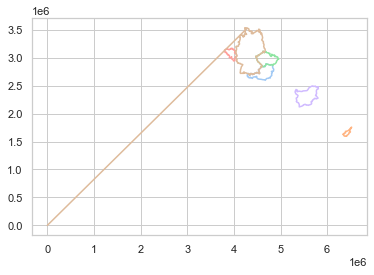

In [ ]:
## loop over records (countries), parts (each country is comosed of 1 or more polugons)
for r in sf.shapeRecords():  
    atr = dict(zip('CNTR_ID', r.record))  
    geom = r.shape.__geo_interface__ 
    countryname = r.record[0]
    shape_parts = r.shape.__geo_interface__['coordinates']
    nparts = len(shape_parts)
    
    if countryname in eunames:
        print(f"printing country {countryname} composed of {nparts} parts ")
        
                
        if nparts == 1:
            shape_points = shape_parts[0]
            
            x_lon = np.zeros((len(shape_points),1))
            y_lat = np.zeros((len(shape_points),1))
            for ip in range(len(shape_points)):
                x_lon[ip] = shape_points[ip][0]
                y_lat[ip] = shape_points[ip][1]
            plt.plot(x_lon,y_lat)

        
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                shape_points = shape_parts[ip]

                print(f'looping over part {ip}, ')
                npoints = len(shape_points[0]) ###########QUI STUDIARE L'ALGORITMO E LA STRUTTURA DATI
                print(f'length of this part = {npoints}')
                
                if npoints > 1:
                    x_lon = np.zeros(300)
                    y_lat = np.zeros(300)
                    for j in range(npoints):
                        print(f"Shape {ip} point {j}")

                        x_lon[j] = shape_points[ip][j][0]
                        y_lat[j] = shape_points[ip][j][1]
                        
                    plt.plot(x_lon,y_lat)


In [ ]:
for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts
    print(country_name)
    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
            
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]

plt.plot(x_lon,y_lat)

In [ ]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
#https://pythonhosted.org/Python%20Shapefile%20Library/ 
records = sf.records

 

In [ ]:
plot_map(sf)




In [ ]:
import bokeh
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [ ]:
import json
#Read data to json.
merged_json = json.loads(eushapes.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [ ]:
merged_json

In [ ]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

In [ ]:
geosource.references

In [ ]:


#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,
          fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)